In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptoppriceprediction/Laptop_price.csv


Laptop Prices Dataset Analysis

Introduction
In this study, we're delving into a collection of information about laptops that covers various aspects affecting their prices. The dataset gives us a glimpse into common laptop features like brand, processor speed, RAM size, storage capacity, screen size, weight, and how they relate to the laptop prices.

Understanding what influences laptop prices is important for both people buying laptops and those in the laptop industry. By analyzing this dataset, we aim to uncover patterns, connections, and trends in the data. This information can be really useful for setting prices, keeping up with market trends, and understanding what consumers prefer.

To do this, we'll start by looking at the dataset, checking out some basic statistics to get a sense of how the data is spread out. After that, we'll use visuals to show how different features are connected to laptop prices. The end goal is to find useful insights that can help with decisions about laptop pricing and understanding how the laptop market works.

This is the code to load the data from the database

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/laptoppriceprediction/Laptop_price.csv')

df.head()


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


Data Overview 

In [3]:
df.describe

<bound method NDFrame.describe of       Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0      Asus         3.830296        16               512    11.185147   
1      Acer         2.912833         4              1000    11.311372   
2    Lenovo         3.241627         4               256    11.853023   
3      Acer         3.806248        16               512    12.280360   
4      Acer         3.268097        32              1000    14.990877   
..      ...              ...       ...               ...          ...   
995      HP         3.343584         4              1000    12.587095   
996    Dell         2.780555         8               256    12.679356   
997    Dell         3.200569         4               512    12.666315   
998    Asus         1.604182         8               256    11.215581   
999  Lenovo         1.711980         4               256    16.561498   

       Weight         Price  
0    2.641094  17395.093065  
1    3.260012  31607.605919  

In [4]:
df.info

<bound method DataFrame.info of       Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0      Asus         3.830296        16               512    11.185147   
1      Acer         2.912833         4              1000    11.311372   
2    Lenovo         3.241627         4               256    11.853023   
3      Acer         3.806248        16               512    12.280360   
4      Acer         3.268097        32              1000    14.990877   
..      ...              ...       ...               ...          ...   
995      HP         3.343584         4              1000    12.587095   
996    Dell         2.780555         8               256    12.679356   
997    Dell         3.200569         4               512    12.666315   
998    Asus         1.604182         8               256    11.215581   
999  Lenovo         1.711980         4               256    16.561498   

       Weight         Price  
0    2.641094  17395.093065  
1    3.260012  31607.605919  
2

With this line of code i can see if their is any missing values in the dataset

In [5]:
df.isnull().sum()


Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

This leads me to the next step data visualisation, this will help stakeholders learn more about through data visualisation 

Data Visualisation

1) Brand Distribution

To better understand how laptop brands are distributed in our dataset, we'll begin by creating visualizations that show the count of each brand. This will give us a clear picture of how various laptop brands are represented in our dataset.

In [6]:
brand_num = df['Brand'].value_counts()
brand_num

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

This seperation allows us to understand their are 5 major brands we are looking at in this data set 

To make it visual i use the following code 

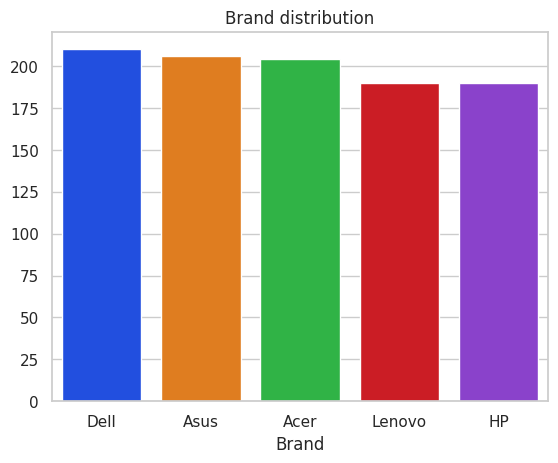

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = 'whitegrid')

sns.barplot(data = df, x= brand_num.index, y = brand_num.values, palette ='bright')
plt.title('Brand distribution')
plt.show()


2) Histogram with the distribution of prices

To understand the general pattern of laptop prices, a histogram is created to display how frequently different price ranges occur. This visual representation offers a quick overview of how prices are spread throughout the dataset, providing insights into the central tendency and variability in pricing.

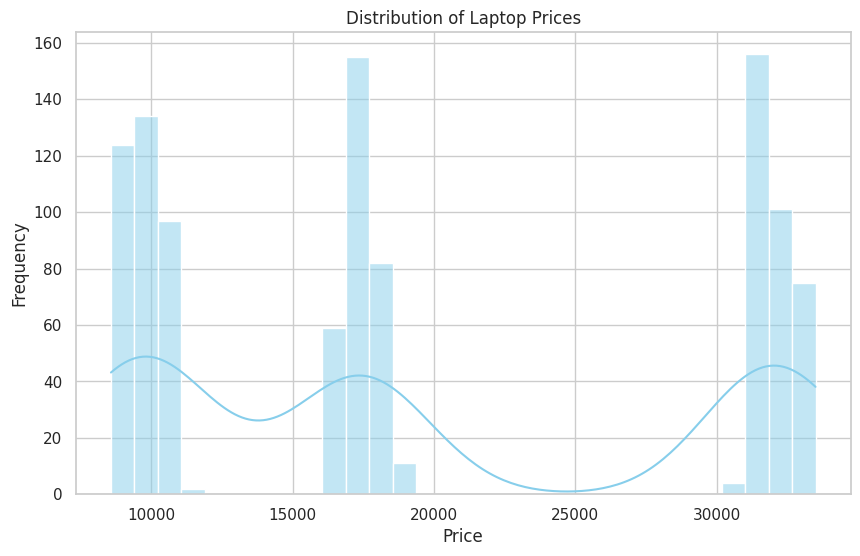

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Price', kde=True, bins=30, color='skyblue')

plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()


3) Analysis of Laptop Prices by Brand

In this examination, we investigate how laptop prices are distributed among various brands using histograms. Each brand is depicted with its own histogram, providing a means to observe the diverse patterns in pricing across different manufacturers.

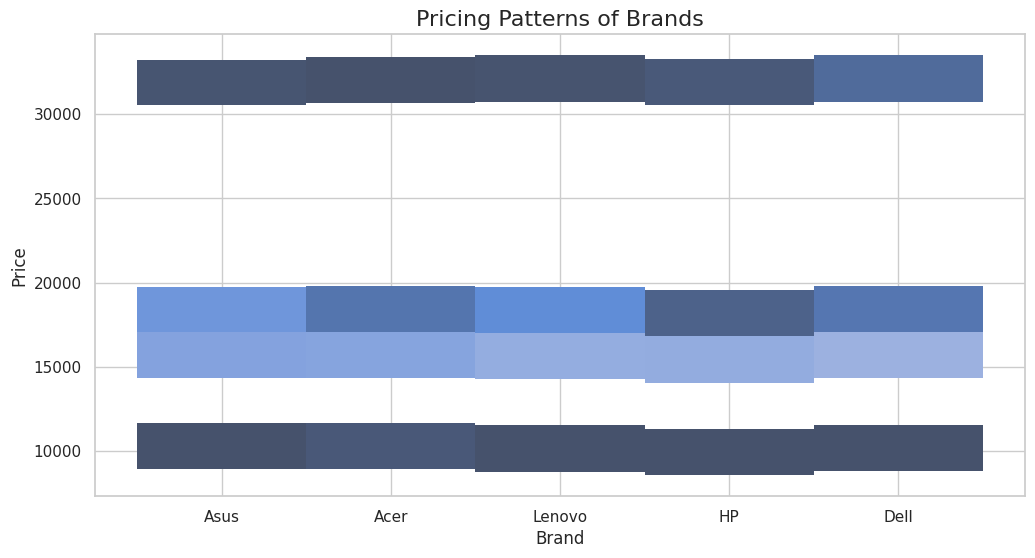

In [9]:
sns.set(style = 'whitegrid')

fig, ax = plt.subplots(figsize =(12,6))

for i, brand in enumerate(df['Brand'].unique()):
    subset_data = df[df['Brand'] ==brand]
    sns.histplot(x= 'Brand', y= 'Price', data = subset_data, ax =ax, label = brand)

ax.set_title('Pricing Patterns of Brands',  fontsize = 16)
ax.set_xlabel('Brand')
ax.set_ylabel('Price')

plt.show()

4) Most popular laptop brand 

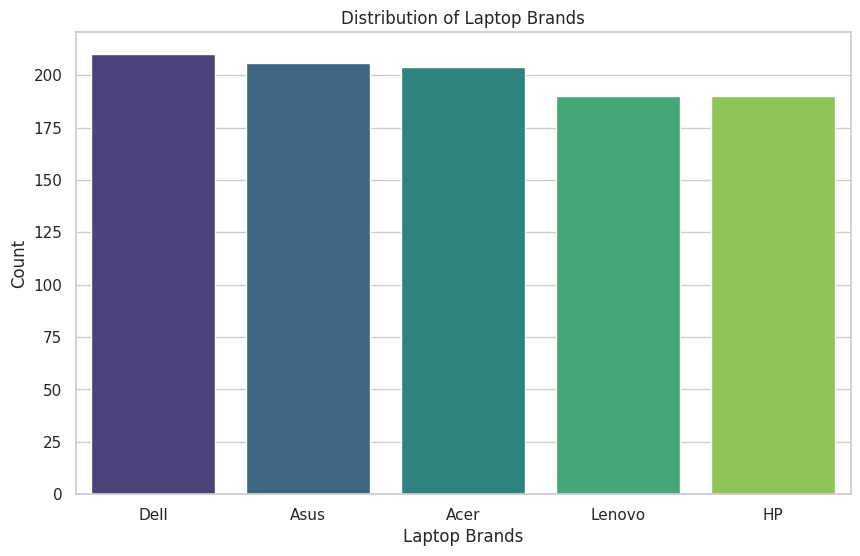

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='Brand', order=df['Brand'].value_counts().index, palette='viridis')

plt.title('Distribution of Laptop Brands')
plt.xlabel('Laptop Brands')
plt.ylabel('Count')

plt.show()

5) Explore the relationship between the weight of laptops and their prices.


Scatter Plot:
Dots (Orange Points): Each orange dot represents an individual laptop in the dataset. The x-coordinate of the dot corresponds to the weight of the laptop, and the y-coordinate corresponds to its price.

Interpretation:

Trend: The overall pattern or trend in the scatter plot reveals how laptop prices change concerning their weight. If there is a noticeable pattern, it suggests a relationship between weight and price.

Dispersion: The spread or dispersion of dots indicates how variable laptop prices are for different weights. A wider spread suggests a broader range of prices.

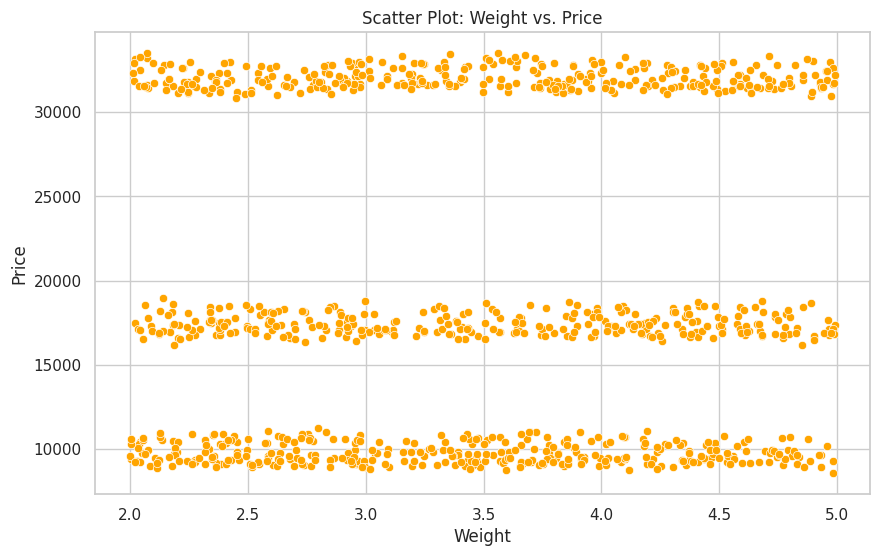

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Weight', y='Price', color='orange')

plt.title('Scatter Plot: Weight vs. Price')
plt.xlabel('Weight')
plt.ylabel('Price')

plt.show()

6) Compare the distribution of prices for different brands.


Here we are invesigating the difference in price patterns compared to different brands including median prices

Box Plot:
Box (Colored Boxes): Each box represents the interquartile range (IQR) of laptop prices for a specific brand. The bottom and top edges of the box represent the 25th and 75th percentiles, respectively. The median (50th percentile) is indicated by the line inside the box.

Whiskers (Lines extending from the boxes): The whiskers extend to show the range of prices within a certain limit from the box. Any individual data points beyond the whiskers are considered potential outliers.

Strip Plot:
Individual Data Points (Black Dots): Each black dot represents the price of an individual laptop within a brand. These dots help visualize the distribution of prices for each brand.

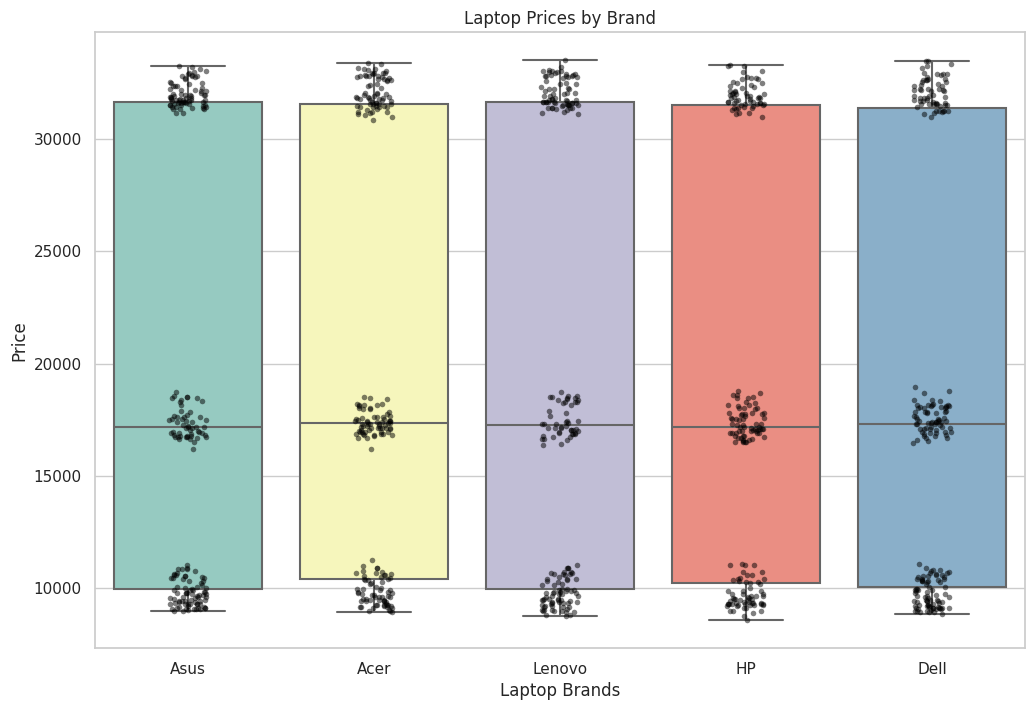

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 8))

sns.boxplot(data=df, x='Brand', y='Price', palette='Set3')
sns.stripplot(data=df, x='Brand', y='Price', color='black', size=4, alpha=0.5)

plt.title('Laptop Prices by Brand')
plt.xlabel('Laptop Brands')
plt.ylabel('Price')

plt.show()

7) Display the correlation matrix between different features and prices.


Positive Correlation (Warmer Colors):

If the color is closer to the warm (reddish) side, it indicates a positive correlation. For example, if Processor_Speed increases, there is a tendency for other positively correlated features to increase as well.

Negative Correlation (Cooler Colors):
If the color is closer to the cool (bluish) side, it indicates a negative correlation. In contrast, if one feature increases, the other tends to decrease.

Strength of Correlation:
The numerical annotations on the heatmap indicate the strength of correlation. Values closer to 1 represent a stronger positive correlation, while values closer to -1 represent a stronger negative correlation. Values around 0 suggest a weaker or no correlation.

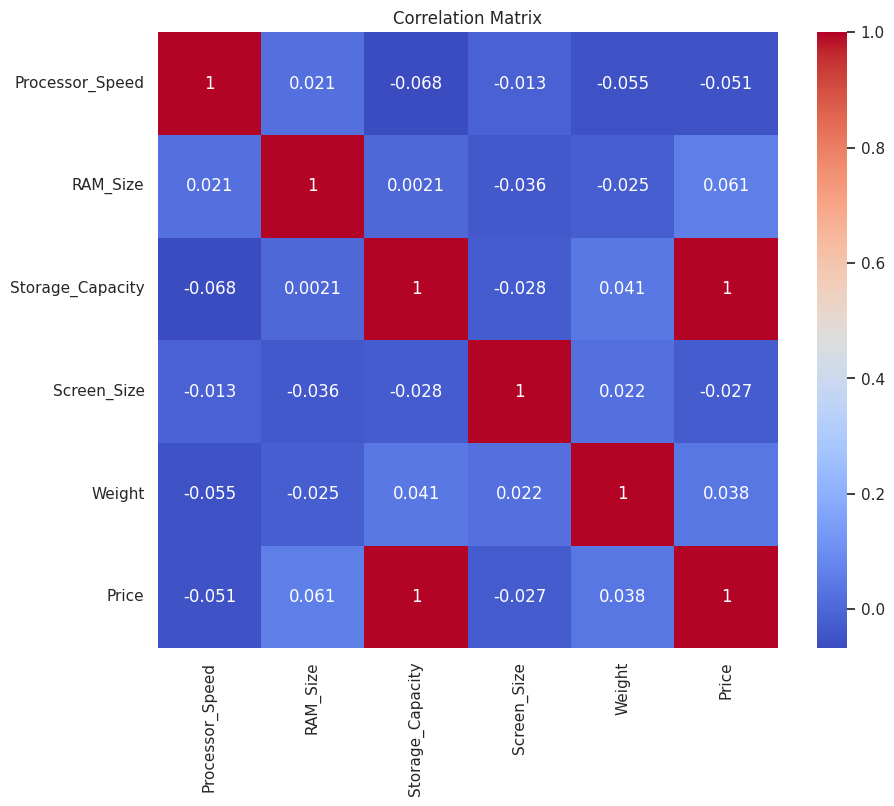

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='white')

df_corr = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']

plt.figure(figsize=(10, 8))
sns.heatmap(df[df_corr].corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()